<a href="https://colab.research.google.com/github/aparnaashok2125/Elevvo-Pathways-NLP-Internship/blob/main/Elevvo_Pathways_Task_3_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3 - Fake News Detection

📰 Fake News Detection using Machine Learning – Task 3 | NLP Internship at Elevvo Pathways
In today's digital world, the rapid spread of misinformation is a growing concern. As part of my NLP internship at Elevvo Pathways, I worked on a project to tackle this challenge through Fake News Detection using Machine Learning.

The objective was to build an intelligent system that can classify news articles as Fake or Real using a labeled dataset from Kaggle. By training ML models on real-world news content, we aim to assist in automatically flagging potentially misleading information.

Throughout the project, I carried out text preprocessing, feature extraction using TF-IDF, and trained multiple classification models to evaluate performance. I experimented with four different classifiers:

1. Logistic Regression
2. Linear SVM (Support Vector Machine)
3. Random Forest Classifier
4. Gradient Boosting Classifier

Each model was evaluated using metrics like accuracy and F1-score. Among them, Logistic Regression and Random Forest gave strong and balanced performance, while SVM was slightly less effective in detecting positive real news.

To visualize insights, I also generated word clouds for Fake vs Real news to observe common patterns, and I built a manual prediction tool that allows classifying custom news snippets interactively.




In [22]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
# Download required NLTK assets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Load dataset
data_fake = pd.read_csv('/content/Fake.csv', engine='python', on_bad_lines='skip')     # fake news
data_true = pd.read_csv('/content/True.csv', engine='python', on_bad_lines='skip')     # real news

In [25]:
# Label data
data_fake['class'] = 0  # Fake news
data_true['class'] = 1  # Real news

In [26]:
# Combine both into one dataset
data = pd.concat([data_fake, data_true], ignore_index=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the dataset


In [27]:
# -------------------------
# TEXT PREPROCESSING
# -------------------------
def clean_text(text):
    nltk.download('punkt', quiet=True) # Download punkt within the function
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return ' '.join(tokens)

In [28]:
# Apply preprocessing on combined title + text
data['processed_text'] = (data['title'].fillna('') + ' ' + data['text'].fillna('')).apply(clean_text)

In [29]:
# -------------------------
# FEATURE EXTRACTION
# -------------------------
X = data['processed_text']
y = data['class']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [32]:
# -------------------------
# MODEL TRAINING & EVALUATION
# -------------------------

# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [34]:
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n🔹 {name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, preds, target_names=['Fake', 'Real']))


🔹 Logistic Regression Results:
Accuracy: 0.9846
F1 Score: 0.9839
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.99      4710
        Real       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980


🔹 Linear SVM Results:
Accuracy: 0.9937
F1 Score: 0.9933
Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4710
        Real       0.99      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


🔹 Random Forest Results:
Accuracy: 0.9962
F1 Score: 0.9960
Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      

In [35]:
# -------------------------
# WORDCLOUD VISUALIZATION
# -------------------------
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

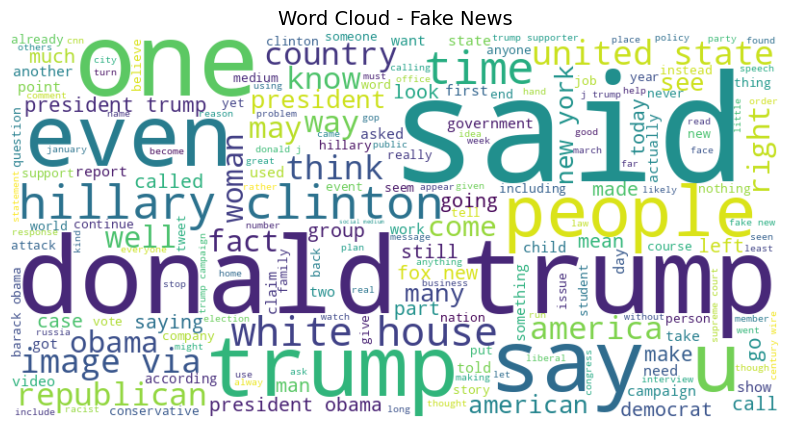

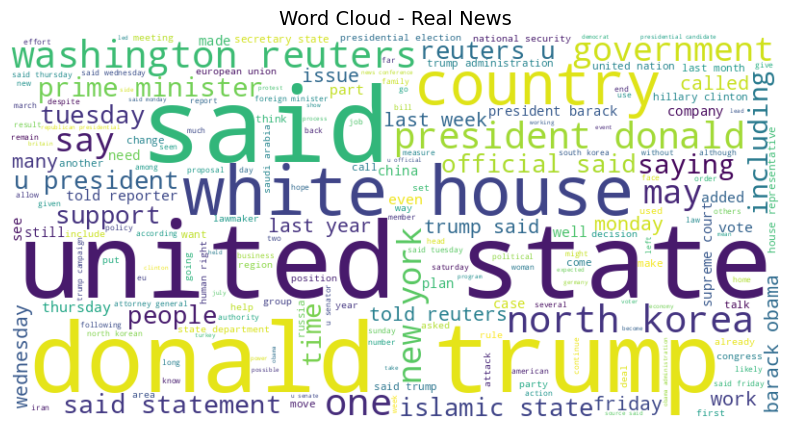

In [36]:
# Create separate word clouds for fake & real
fake_text = ' '.join(data[data['class'] == 0]['processed_text'])
real_text = ' '.join(data[data['class'] == 1]['processed_text'])

generate_wordcloud(fake_text, 'Word Cloud - Fake News')
generate_wordcloud(real_text, 'Word Cloud - Real News')

In [37]:
# -------------------------
# MANUAL PREDICTION FUNCTION
# -------------------------
def manual_testing(news_text):
    cleaned = clean_text(news_text)
    vectorized = tfidf.transform([cleaned])
    preds = {
        "Logistic Regression": models["Logistic Regression"].predict(vectorized)[0],
        "Linear SVM": models["Linear SVM"].predict(vectorized)[0],
        "Random Forest": models["Random Forest"].predict(vectorized)[0],
        "Gradient Boosting": models["Gradient Boosting"].predict(vectorized)[0],
    }
    for model, pred in preds.items():
        print(f"{model} Prediction: {'Fake' if pred == 0 else 'Real'}")

In [38]:
# Example
print("\n🔍 Manual Test Example:")
example_news = input("Enter a news article text:\n")
manual_testing(example_news)


🔍 Manual Test Example:
Enter a news article text:
united states
Logistic Regression Prediction: Real
Linear SVM Prediction: Fake
Random Forest Prediction: Fake
Gradient Boosting Prediction: Fake
